In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.3 MB/s eta 0:00:00


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


5587
(1000, 768)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31105 (\N{CJK UNIFIED IDEOGRAPH-7981}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28961 (\N{CJK UNIFIED IDEOGRAPH-7121}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


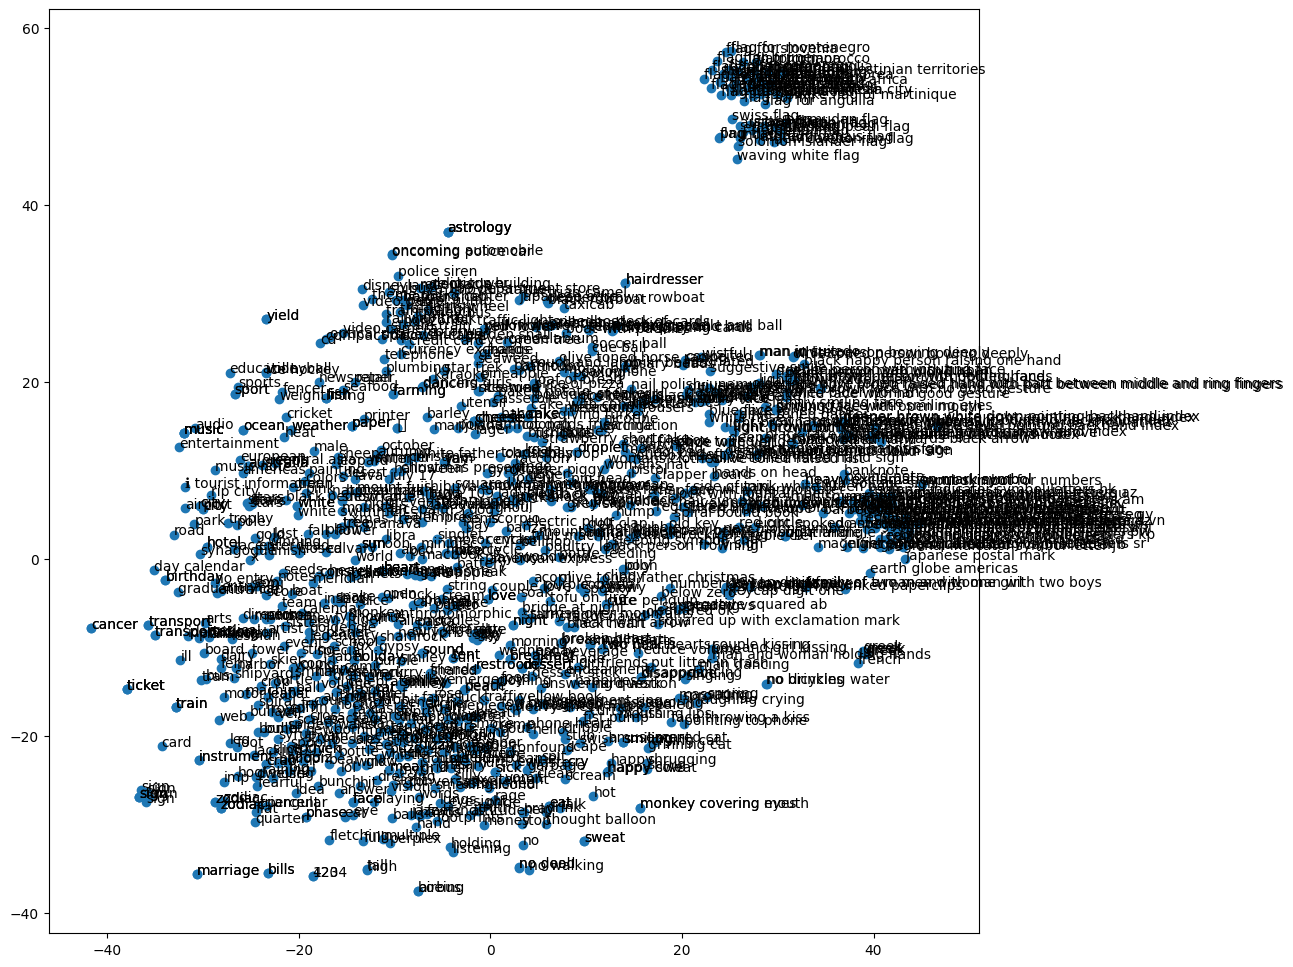

In [1]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

size = 1000

# Instancier le tokenizer et le modèle BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

data = pd.read_csv("train.txt", delimiter='\t')
emoji_description = data.iloc[:,0]
emoji_description = emoji_description.tolist()
print(len(emoji_description))
emoji_description = emoji_description[0:size]

# Prétraiter le texte à encoder avec le modèle BERT
inputs = tokenizer(emoji_description, padding=True, truncation=True, return_tensors='pt')

# Obtenir les embeddings des tokens avec BERT
embeddings = model(**inputs).last_hidden_state
embeddings = embeddings[:, 0, :]

# Appliquer la méthode t-SNE
tsne = TSNE(n_components=2, random_state=42)
print(embeddings.detach().numpy().reshape(-1, 768).shape)
resultats_tsne = tsne.fit_transform(embeddings.detach().numpy().reshape(-1, 768))


# Visualiser les embeddings avec la méthode t-SNE


fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(resultats_tsne[:, 0], resultats_tsne[:, 1])

for i, txt in enumerate(emoji_description):
    ax.annotate(txt, (resultats_tsne[i, 0], resultats_tsne[i, 1]))

plt.show()

In [2]:
import plotly.graph_objects as go

fig = go.Figure()

for i, txt in enumerate(emoji_description):
    fig.add_annotation(
        x=resultats_tsne[i, 0],
        y=resultats_tsne[i, 1],
        text=data.iloc[i,1],
        font=dict(size=15),
        showarrow=False
    )

fig.show()

In [3]:
fig.write_html('figure.html')